In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [2]:
data = pd.read_csv("../input/openpowerlifting.csv")

data.drop(["Squat4Kg","Bench4Kg","Deadlift4Kg"], axis=1, inplace=True)
data.drop_duplicates(inplace=True)
data = data[(data['BestSquatKg'] > 0) & (data['BestBenchKg']>0) & (data['BestDeadliftKg']> 0)]
data = data.dropna()
data['WeightClassKg'] = data['WeightClassKg'].str.extract('(^\d*)') 

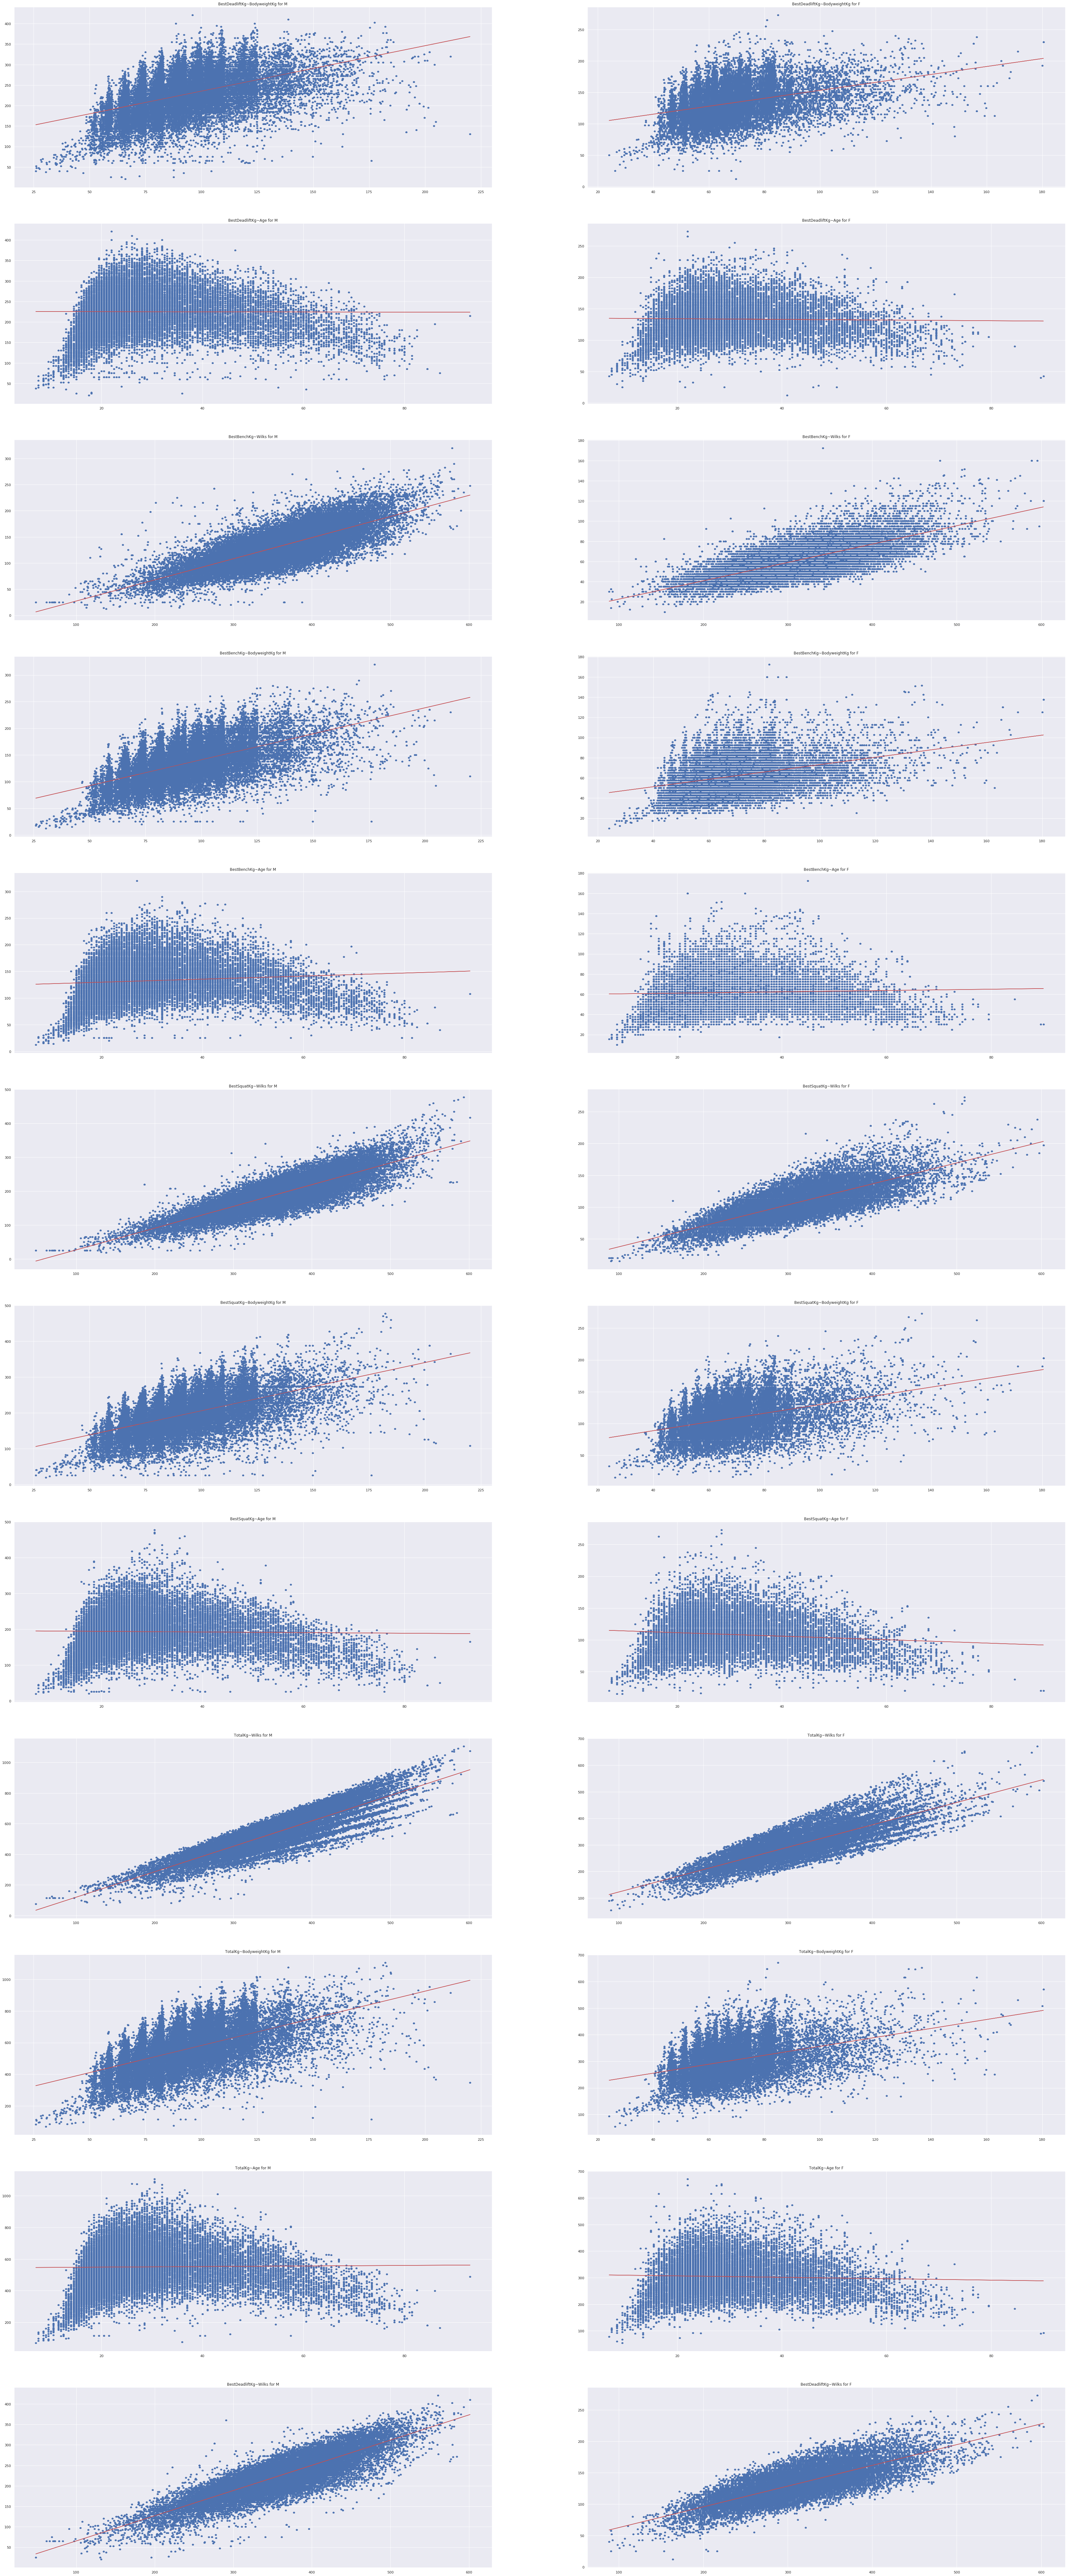

In [3]:
fig,ax = plt.subplots(12,2)
fig.set_size_inches(60,150)
feature_names = ['Age','BodyweightKg', 'Wilks']
outcome_names = ['BestSquatKg','BestBenchKg','BestDeadliftKg','TotalKg']
sexes = ['M', 'F']

data_raw = data[data['Equipment'] == 'Raw']

count=len(outcome_names)+len(feature_names)

for i in range(len(outcome_names)):
    for j in range(len(feature_names)):
        for k in range(len(sexes)):
            data_gender = data_raw[data_raw['Sex'] == sexes[k]]
            slope, intercept, r_value, p_value, std_err = stats.linregress(data_gender[feature_names[j]], data_gender[outcome_names[i]])
        
            line = slope*data_gender[feature_names[j]]+intercept
            ax[count, k].plot(data_gender[feature_names[j]], data_gender[outcome_names[i]],'p')
        
            ax[count, k].plot(data_gender[feature_names[j]], line,'r')
            ax[count, k].set_title(outcome_names[i]+"~"+feature_names[j] + ' for ' + sexes[k])
        count = count -1

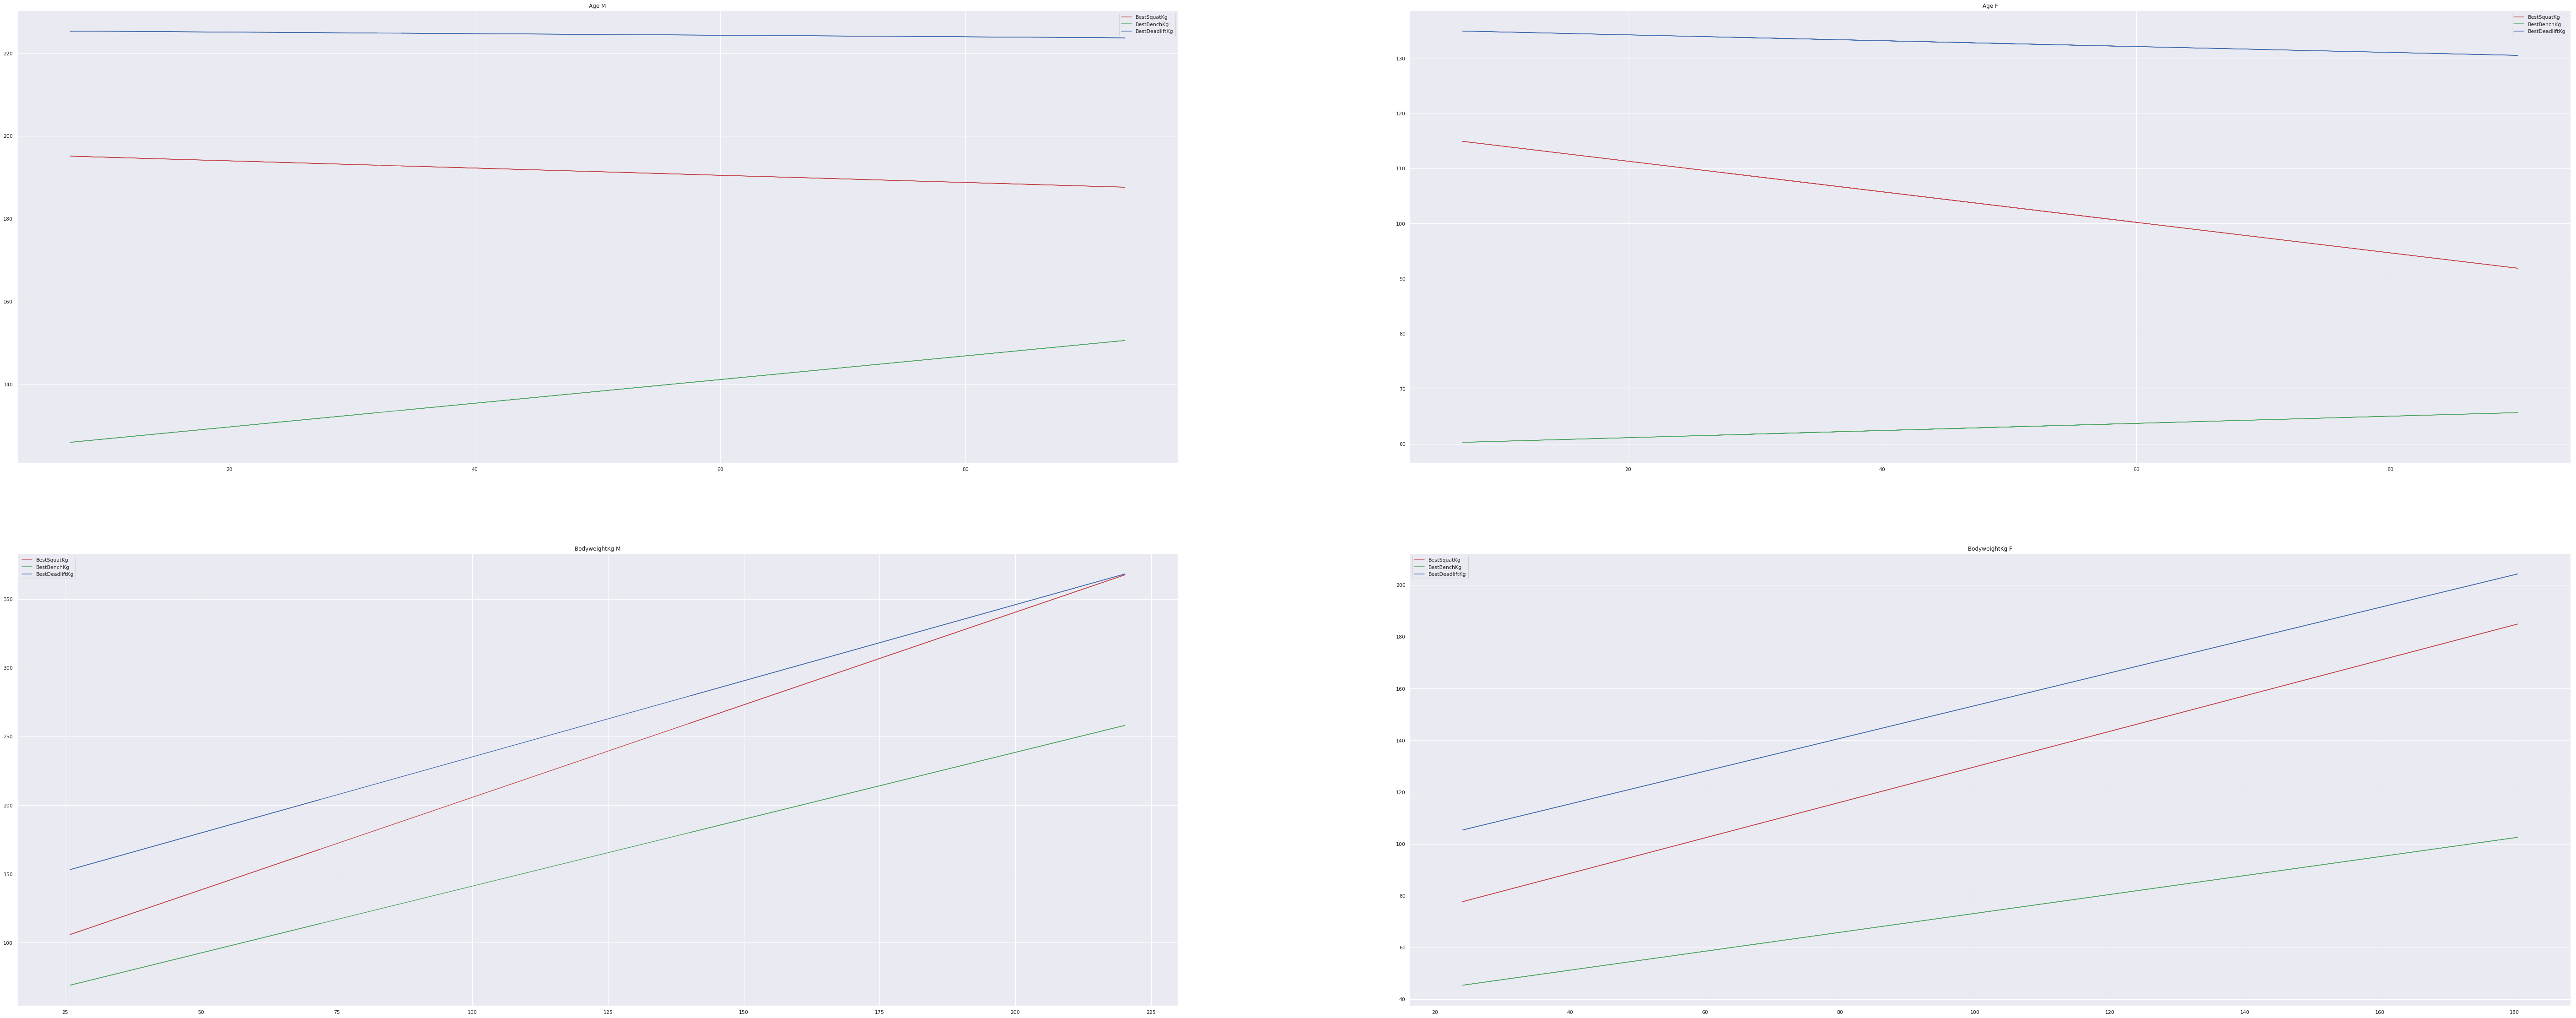

In [4]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(100,40)

feature_names = ['Age','BodyweightKg']
outcome_names = ['BestSquatKg','BestBenchKg','BestDeadliftKg']
colors = ['r', 'g', 'b', 'y']
sexes = ['M', 'F']

data_raw = data[data['Equipment'] == 'Raw']

for i in range(len(outcome_names)):
    for j in range(len(feature_names)):
        for k in range(len(sexes)):
            data_gender = data_raw[data_raw['Sex'] == sexes[k]]
            slope, intercept, r_value, p_value, std_err = stats.linregress(data_gender[feature_names[j]], data_gender[outcome_names[i]])        
            line = slope * data_gender[feature_names[j]] + intercept
        
            ax[j,k].plot(data_gender[feature_names[j]], line, colors[i], label = outcome_names[i])        
            ax[j,k].set_title(feature_names[j] + ' ' + sexes[k]) 
            ax[j,k].legend()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


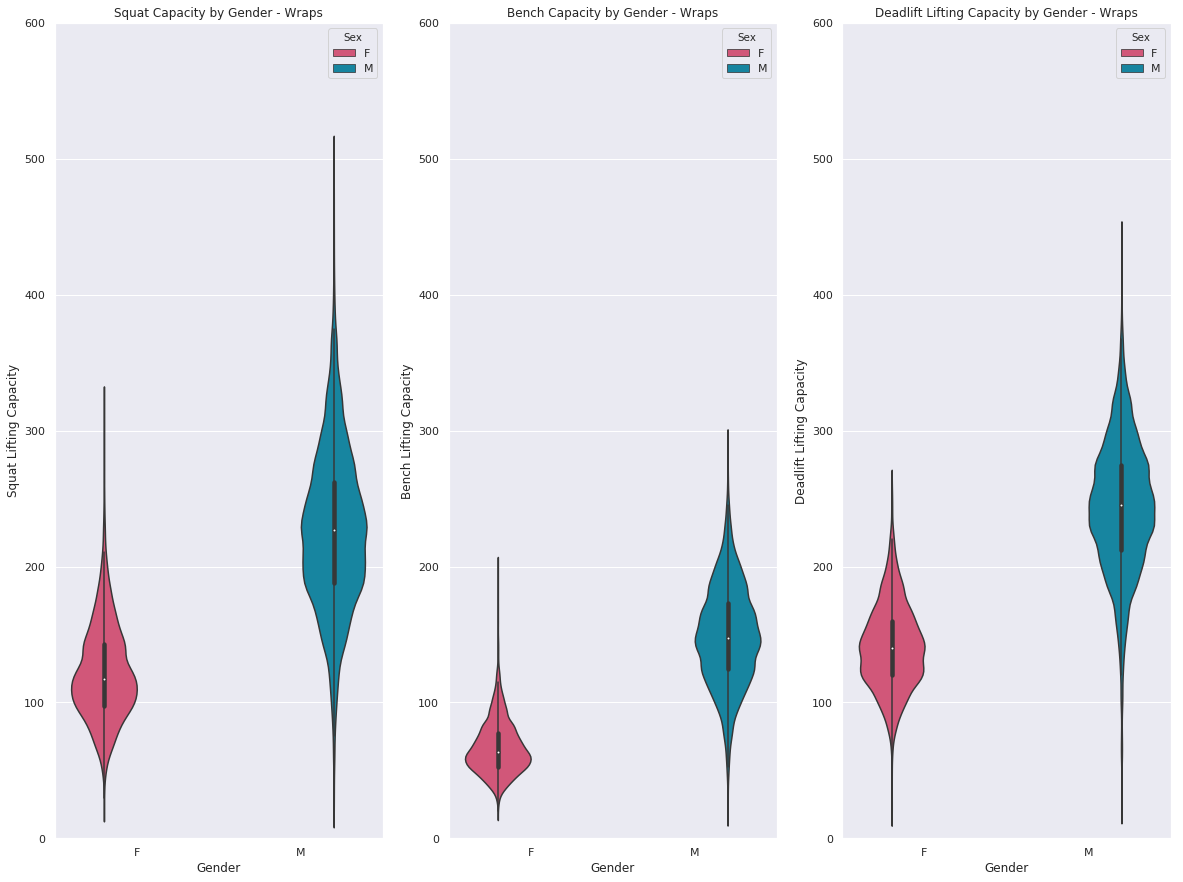

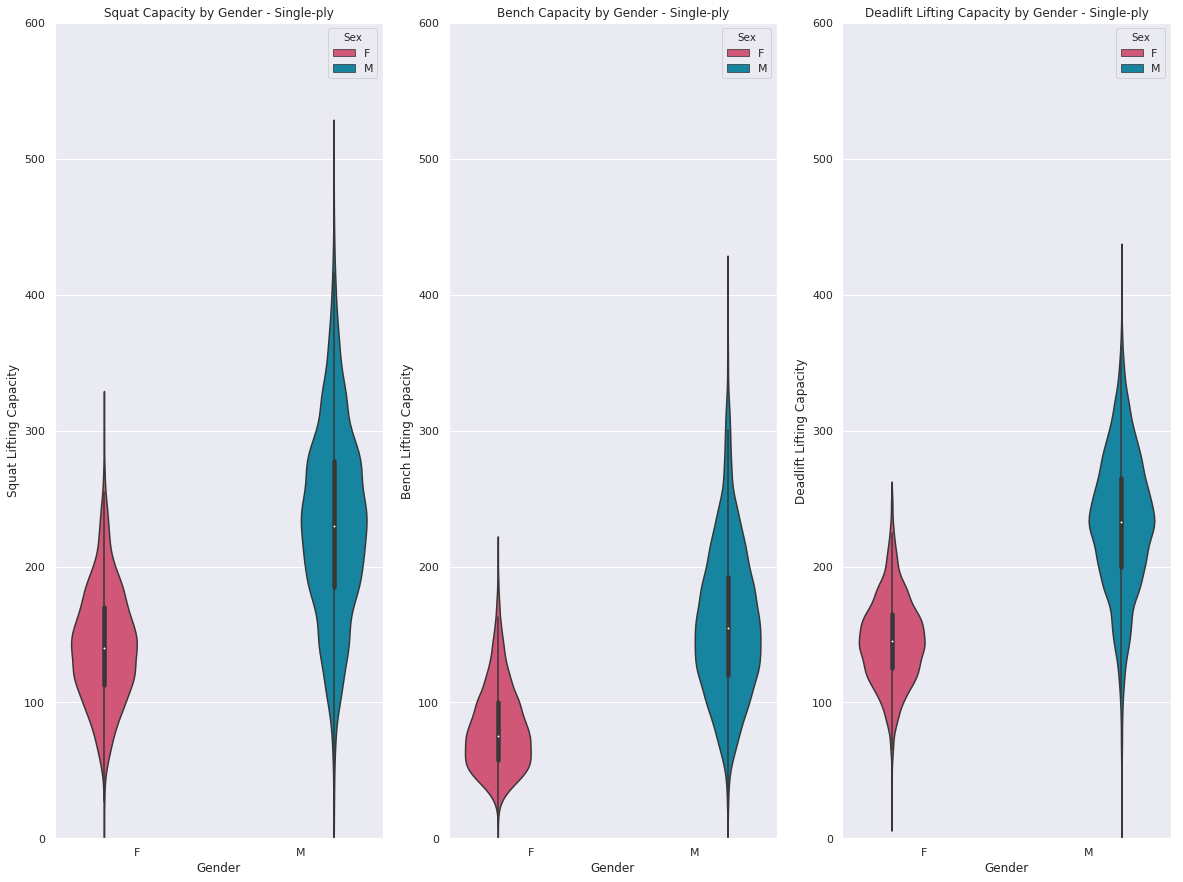

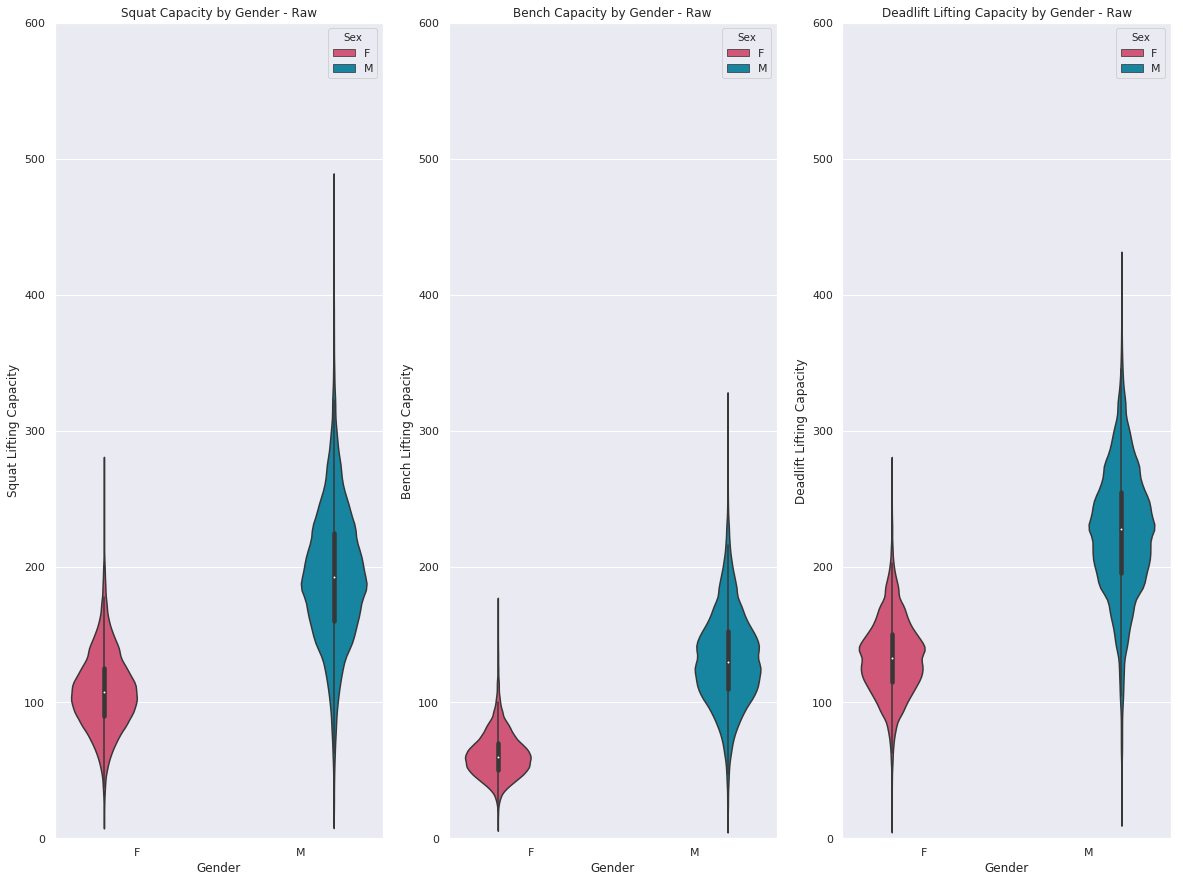

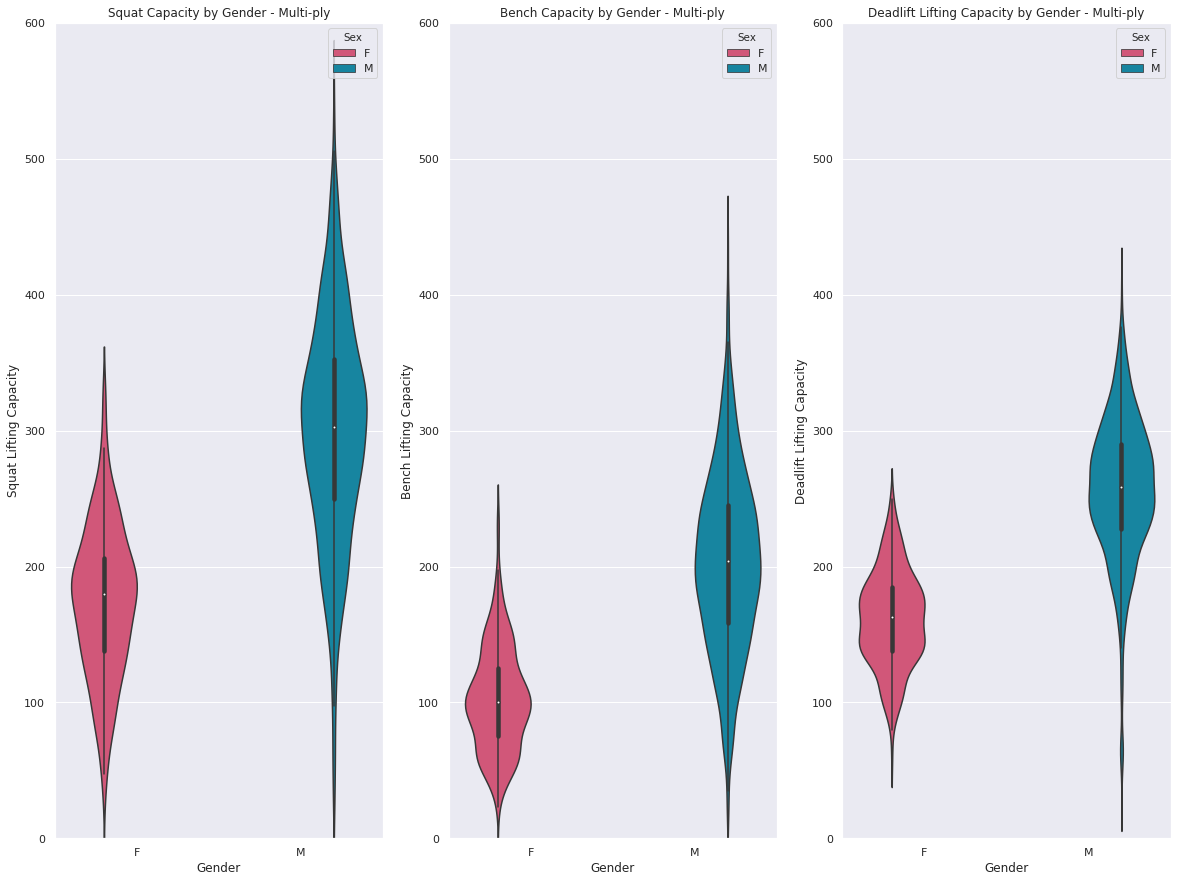

In [5]:
equipment_types = data['Equipment'].unique()

for i in range(len(equipment_types)):
    plt.figure(i, figsize = (20,15))
    
    data_equipment = data[data['Equipment'] == equipment_types[i]]
    
    plt.subplot(1,3,1)
    plt.ylim(0,600)
    sns.violinplot(data = data_equipment, x = 'Sex', y = 'BestSquatKg',hue = 'Sex', scale = 'count',dodge = True, palette = ['#e54370','#0093b7'])
    plt.style.use("fast")
    plt.title('Squat Capacity by Gender - ' + equipment_types[i])
    plt.xlabel('Gender')
    plt.ylabel('Squat Lifting Capacity')

    plt.subplot(1,3,2)
    plt.ylim(0,600)
    plt.style.use("fast")
    sns.violinplot(data = data_equipment, x = 'Sex', y = 'BestBenchKg',hue = 'Sex',scale = 'count',dodge = True, palette = ['#e54370','#0093b7'])
    plt.xlabel('Gender')
    plt.ylabel('Bench Lifting Capacity')
    plt.title('Bench Capacity by Gender - ' + equipment_types[i])

    plt.subplot(1,3,3)
    plt.ylim(0,600)
    plt.style.use("fast")
    sns.violinplot(data = data_equipment, x = 'Sex', y = 'BestDeadliftKg',hue = 'Sex',scale = 'count',dodge = True, palette = ['#e54370','#0093b7'])
    plt.xlabel('Gender')
    plt.ylabel('Deadlift Lifting Capacity')
    plt.title('Deadlift Lifting Capacity by Gender - ' + equipment_types[i])

plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


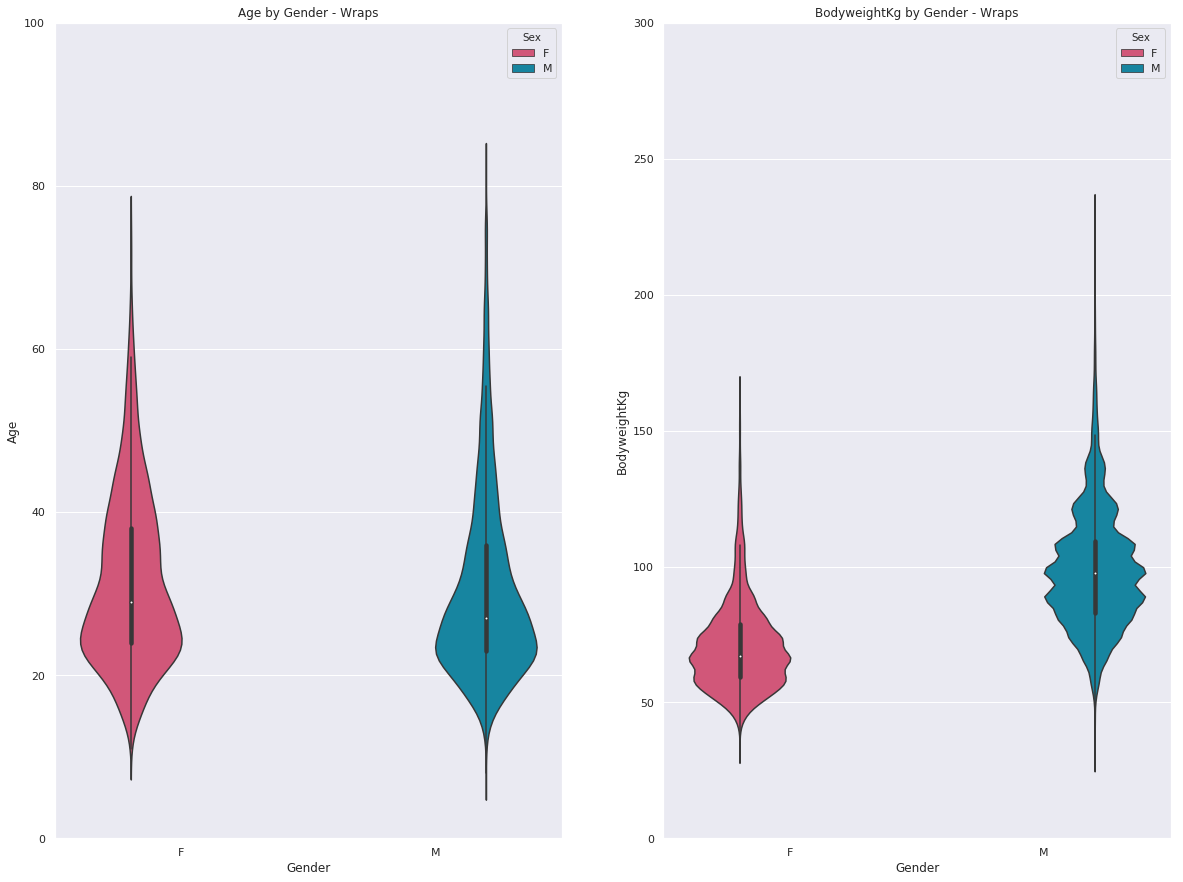

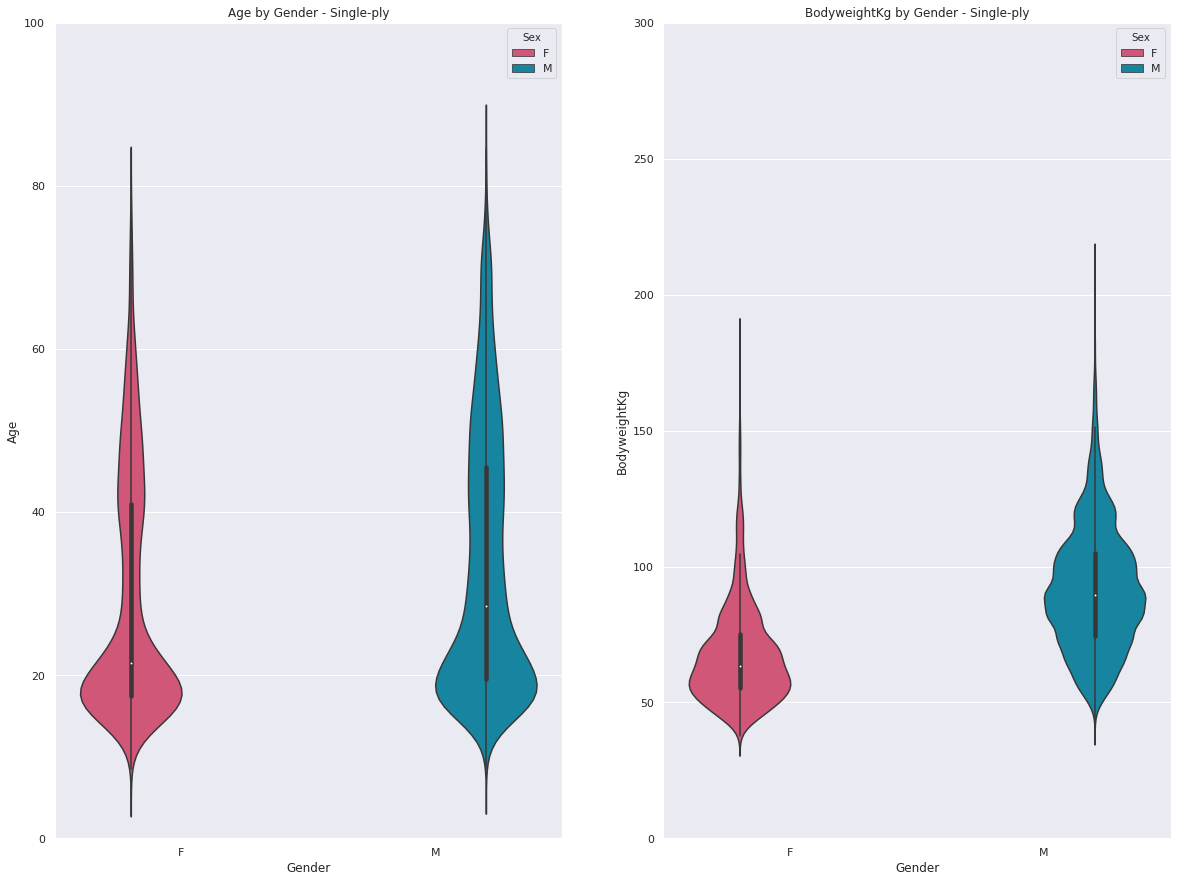

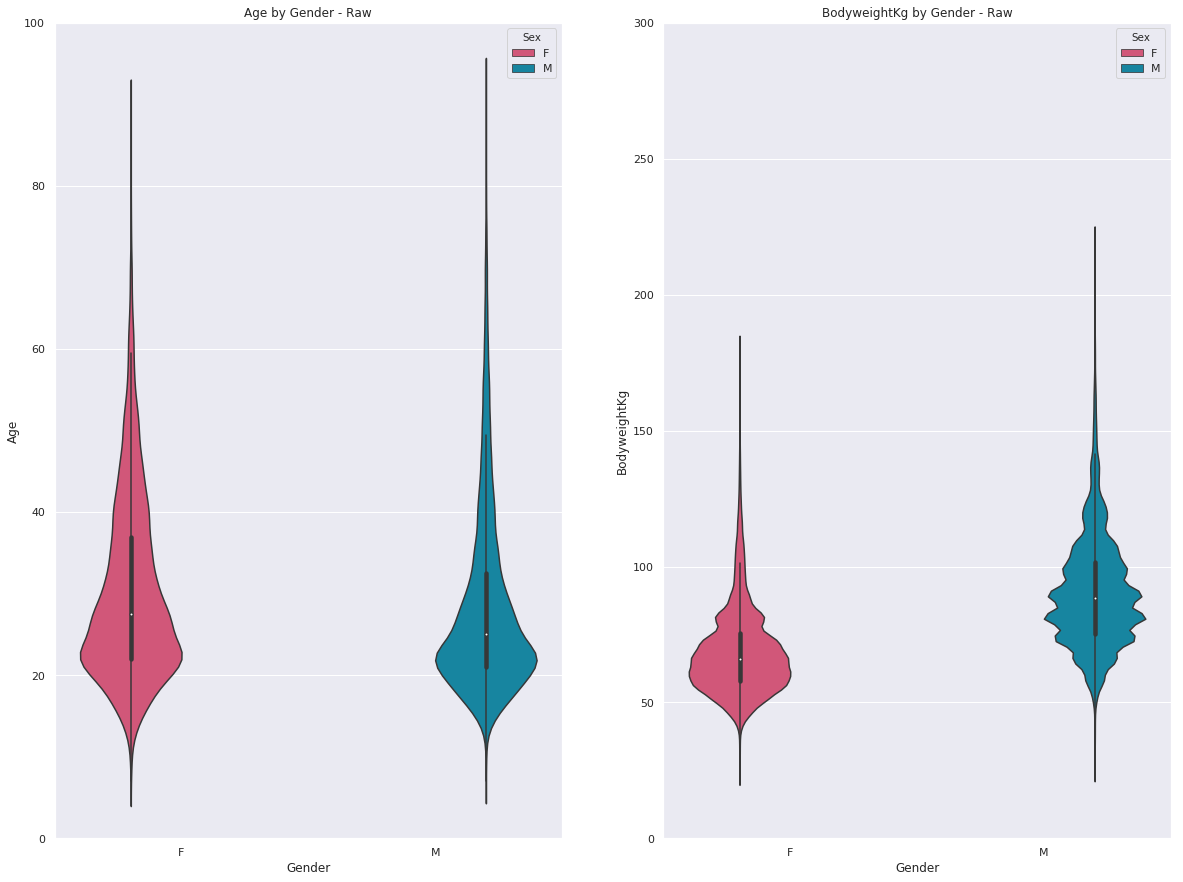

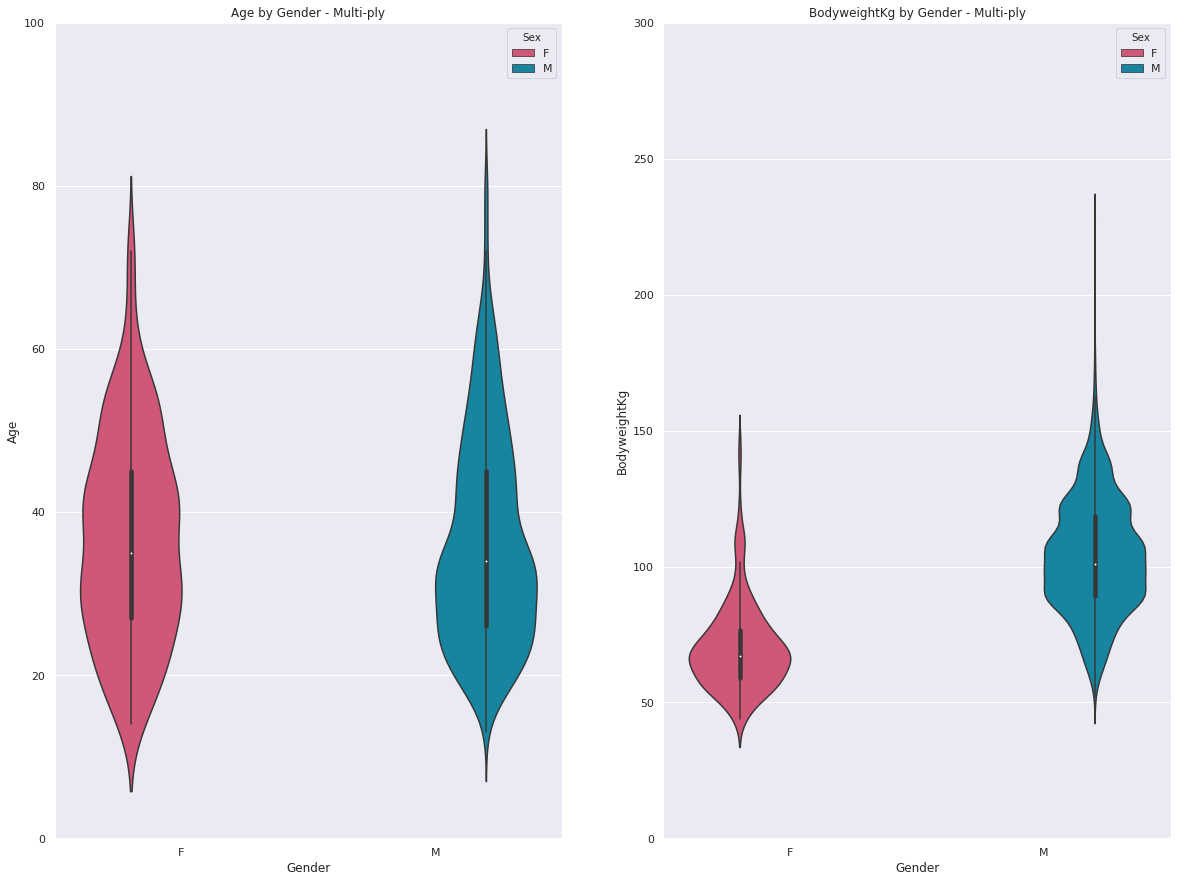

In [6]:
equipment_types = data['Equipment'].unique()
feature_names = ['Age','BodyweightKg']

for i in range(len(equipment_types)):
    plt.figure(i, figsize = (20,15))
    
    data_equipment = data[data['Equipment'] == equipment_types[i]]
    
    plt.subplot(1,2,1)
    plt.ylim(0,100)
    sns.violinplot(data = data_equipment, x = 'Sex', y = 'Age',hue = 'Sex', scale = 'count',dodge = True, palette = ['#e54370','#0093b7'])
    plt.style.use("fast")
    plt.title('Age by Gender - ' + equipment_types[i])
    plt.xlabel('Gender')
    plt.ylabel('Age')

    plt.subplot(1,2,2)
    plt.ylim(0,300)
    plt.style.use("fast")
    sns.violinplot(data = data_equipment, x = 'Sex', y = 'BodyweightKg',hue = 'Sex',scale = 'count',dodge = True, palette = ['#e54370','#0093b7'])
    plt.xlabel('Gender')
    plt.ylabel('BodyweightKg')
    plt.title('BodyweightKg by Gender - ' + equipment_types[i])

plt.show()